# Melbourne Housing Market Data Pre-preprocessing

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_column',100)
mh = pd.read_csv('Melbourne_housing_FULL.csv')

Data yang akan kami analisis ialah meruapakan dataset penjualan rumah di kota melbourne. Diketahui bahwa penjualan rumah tersebut erat kaitannya dengan.

- Type rumah (jumlah ruangan, kamar mandi, garasi mobil).
- Suburb yang di dasari oleh jarak rumah menuju Central Business District (CBD).
- Luas lahan kosong dari rumah tersebut.
- Luas bangunan rumah.

Berikut merupakan gambaran awal dari dataset Melbourne House Market.

Dataset ini memiliki 34857 rows dan 21 kolom dengan penjelasan setiap kolom sebagai berikut.

- Suburb: daerah di pinggiran kota
- Address: Alamat rumah tersebut
- Rooms: Jumlah ruangan 
- Price: Harga dalam AUD
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
- SellerG: Agen Real Estate
- Date: Tanggal Terjual
- Distance: Jarak dari CBD dalam kilometer
- Regionname: General Region (West, North West, North, North east , dll)
- Propertycount: Jumlah properti yang ada di pinggiran kota.
- Bedroom2 : Bagian dari ruangan (dari source yang berbeda)
- Bathroom: Jumlah Kamar mandi
- Car: Jumlah garasi mobil
- Landsize: Luas lahan kosong dalam meter
- BuildingArea: Luas Bangunan dalam meter
- YearBuilt: Tahun pembuatan rumah 
- CouncilArea: Dewan pemerintahan untuk daerah tersebut
- Lattitude: Self explanitory
- Longtitude: Self explanitory

In [3]:
mh.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
mh.shape

(34857, 21)

In [5]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

Terdapat 5 kolom untuk data kategorical dan sisinya ialah object dan numerical

In [6]:
mh.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

## Check Persentase Missing Value untuk Column & Data Corelation

Tabel untuk melakukan check terhadap data yang masih mempunya nilai Nan.

In [7]:
total = mh.isnull().sum().sort_values(ascending=False)
percent = ((mh.isnull().sum()/mh.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys = ['Total','Percent'])
missing_data

,Total,Percent
BuildingArea,21115,60.576068
YearBuilt,19306,55.386293
Landsize,11810,33.881286
Car,8728,25.039447
Bathroom,8226,23.599277
Bedroom2,8217,23.573457
Longtitude,7976,22.882061
Lattitude,7976,22.882061
Price,7610,21.832057
Regionname,3,0.008607


Heatmap correlation kami gunakan untuk menjadi pertimbangan untuk pengisian missing value (Nan) 

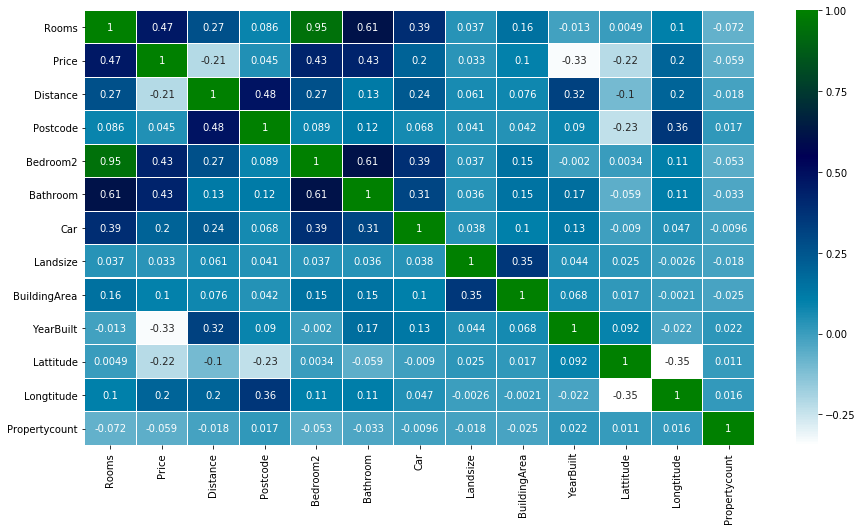

In [8]:
# Show corelation between another column 
figure = plt.figure(figsize=(15,8))
sns.heatmap(mh.corr(), cmap ='ocean_r', linewidth = 0.1, annot=True)

## Cleaning Data

 #### Drop all column Year Built, row Propertycount, Bedroom2

Drop terhadap kolom 'YearBuilt' dikarenakan kecilnya korelasi pembangunan sebuah rumah dengan harga jual.

In [9]:
mh.drop('YearBuilt', axis = 1, inplace=True)

Drop terhadap kolom 'Propertycount' karena hanya terdapat 3 missing value dari total data.

In [10]:
mh.dropna(subset=['Propertycount'],inplace=True)

Drop terhadap kolom 'Bedroom2' dikarenakan kolom tersebut sudah cukup di representasikan dengan total jumlah ruangan dari setiap data di kolom 'Rooms'

In [11]:
mh.drop('Bedroom2', axis =1, inplace=True)

#### Fill Data Landsize

Missing value di kolom 'Landsize' kami gunakan pendeketan korelasi antara type dan jumlah ruangan dari rata-rata luas lahan kosong masing-masing rumah.

In [12]:
group_Landsize = round(mh.groupby(['Type','Rooms']).mean()['Landsize'])

In [13]:
def applyLandsize(x):
    if (x['Landsize']) > 0:
        return x['Landsize']
    else :
        return (group_Landsize.loc[x['Type']][x['Rooms']])

In [14]:
mh['Landsize'] = mh[['Landsize','Type','Rooms']].apply(applyLandsize,axis = 1)

Untuk proses drop berikut, dikarenakan ada type rumah berdasarkan ruangan tidak memiliki nilai untuk luas lahan kosong.

In [15]:
mh.dropna(subset=['Landsize'],inplace=True)

#### Fill Data Building Area 

Missing value di kolom 'BuildingArea' kami gunakan pendeketan korelasi antara type dan luas lahan dari rata-rata luas bangunan masing-masing type rumah. Karena luas bangunan dari setiap type akan di pengaruhi kuat oleh luas lahan dari rumah tersebut.

In [16]:
group_BuildingArea = mh.groupby(['Type','Landsize']).mean()['BuildingArea']

In [17]:
# Contoh Penggunaan argmin
# mencari nilai terkecil dari function yang di inputkan
np.argmin(abs(mh[(mh['BuildingArea'].notnull())]['Landsize'] - 79))

186

In [18]:
def applyBuildingArea(x):
    buildingArea_notnull = mh[(mh['Type']==x['Type']) & (mh['BuildingArea'].notnull())]['Landsize']
    if pd.notnull(x['BuildingArea']):
        return x['BuildingArea']
    else:
        idx = np.argmin(np.abs(buildingArea_notnull - x['Landsize']))
        return round(mh.groupby(['Landsize','Type']).mean()['BuildingArea'].loc[mh['Landsize'][idx]][x['Type']])

In [19]:
mh['BuildingArea'] = mh[['BuildingArea','Type','Landsize']].apply(applyBuildingArea,axis = 1)

#### Fill Data Bathroom

Missing value di kolom 'Bathroom' kami gunakan pendeketan korelasi antara type dan luas lahan dari rata-rata luas bangunan masing-masing type rumah. Karena ruangan & luas bangunan akan mewakili dan memiliki keterkaitan dengan jumlah dari kamar mandi.

In [20]:
group_Bathroom = round(mh.groupby(['BuildingArea','Rooms']).mean()['Bathroom'])

In [21]:
def applyBathroom(x):
    bathroom_notnull = mh[(mh['Rooms'] == x['Rooms']) & (mh['Bathroom'].notnull())]['BuildingArea']
    if pd.notnull(x['Bathroom']):
        return x['Bathroom']
    else:
        idx = np.argmin(np.abs(bathroom_notnull - x['BuildingArea']))
        return round(group_Bathroom.loc[mh['BuildingArea'][idx]][x['Rooms']])

In [22]:
mh['Bathroom'] = mh[['Bathroom','Rooms','BuildingArea']].apply(applyBathroom,axis = 1)

#### Fill Data Car

Missing value di kolom 'Car' kami gunakan pendeketan korelasi antara type dan jarak rumah ke CBD dari  dari masing-masing type rumah.

In [23]:
group_car= round(mh.groupby(['Distance','Type']).mean()['Car'])

In [24]:
def applyCar(x): 
    car_notnull = mh[(mh['Type'] == x['Type']) & (mh['Car'].notnull())]['Distance']
    if pd.notnull(x['Car']):
        return x['Car']
    else:
        idx = np.argmin(np.abs(car_notnull - x['Distance']))
        return round(group_car.loc[mh['Distance'][idx]][x['Type']])

In [25]:
mh['Car'] = mh[['Car','Distance','Type']].apply(applyCar, axis=1)

#### Fill Data Longitude 

Pengisian missing value untuk Latitude dan longitude yang pertama didasari oleh.

- Suburb karena memilki unik value yang lebih besar dan akan lebih akurat untuk setiap titik dari longitude dan latitude.
- Postcode mewakili juga untuk unik value yang cukup banyak dan ada kaitannya dengan suburb dan alamat dari rumah tersebut.
- Council Area merupakan gambaran dari daerah sekitar

##### Fill Data with Suburb

In [26]:
group_Longitude = round(mh.groupby('Suburb').mean()['Longtitude'],4)

In [27]:
def applyLong(x):
    if pd.notnull(x['Longtitude']):
        return x['Longtitude']
    else:
        return group_Longitude.loc[x['Suburb']]

In [28]:
mh['Longtitude'] = mh[['Longtitude', 'Suburb']].apply(applyLong,axis = 1)

##### Fill Data with Postcode

In [29]:
group_Longitude1 = round(mh.groupby('Postcode').mean()['Longtitude'],4)

In [30]:
def applyLong1(x):
    if pd.notnull(x['Longtitude']):
        return x['Longtitude']
    else:
        return group_Longitude1.loc[x['Postcode']]

In [31]:
mh['Longtitude']= mh[['Longtitude', 'Postcode']].apply(applyLong1,axis = 1)

##### Fill Data with Council Area

In [32]:
group_Longitude2 = round(mh.groupby('CouncilArea').mean()['Longtitude'],4)

In [33]:
# Nan at Yarra Ranges Shire Council fillna with mean from Yarra Ranges Shire Council
mh[mh['Longtitude'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18669,Olinda,30 Monash Av,4,h,NaN,SA,Fletchers,15/07/2017,30.6,3788.0,2.0,2.0,726.0,209.0,Yarra Ranges Shire Council,NaN,NaN,Eastern Victoria,794.0


In [34]:
mh['Longtitude'].fillna(145.3354, inplace=True)

#### Fill Data Latitude

##### Fill Data with Suburb

In [35]:
group_Latitude= round(mh.groupby('Suburb').mean()['Lattitude'],4)

In [36]:
def applyLat(x):
    if pd.notnull(x['Lattitude']):
        return x['Lattitude']
    else:
        return group_Latitude.loc[x['Suburb']]

In [37]:
mh['Lattitude'] = mh[['Lattitude', 'Suburb']].apply(applyLat,axis = 1)

##### Fill Data with Postcode

In [38]:
group_Latitude1= round(mh.groupby('Postcode').mean()['Lattitude'],4)

In [39]:
def applyLat1(x):
    if pd.notnull(x['Lattitude']):
        return x['Lattitude']
    else:
        return group_Latitude1.loc[x['Postcode']]

In [40]:
mh['Lattitude'] = mh[['Lattitude', 'Postcode']].apply(applyLat1,axis = 1)

##### Fill Data with Council Area

In [41]:
group_Latitude2= round(mh.groupby('CouncilArea').mean()['Lattitude'],4)

In [42]:
# Nan at Yarra Ranges Shire Council fillna with mean from Yarra Ranges Shire Council
mh[mh['Lattitude'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18669,Olinda,30 Monash Av,4,h,NaN,SA,Fletchers,15/07/2017,30.6,3788.0,2.0,2.0,726.0,209.0,Yarra Ranges Shire Council,NaN,145.3354,Eastern Victoria,794.0


In [43]:
mh['Lattitude'].fillna(-37.7800, inplace=True)

#### Fill Data Price

Pengisian missing value untuk data price dengan pendekatan terhadap type dan luas bangunan. yang memilki korelasi yang cukup kuat untuk dijadikan dasar pengisian missing value tersebut. Korelasi luas banguan (0.55)

In [44]:
group_Price= round(mh.groupby(['BuildingArea','Type']).mean()['Price'])

In [45]:
def applyPrice(x): 
    price_notnull = mh[(mh['Type'] == x['Type']) & (mh['Price'].notnull())]['BuildingArea']
    if pd.notnull(x['Price']):
        return x['Price']
    else:
        idx = np.argmin(np.abs(price_notnull - x['BuildingArea']))
        return round(group_Price.loc[mh['BuildingArea'][idx]][x['Type']])

In [46]:
mh['Price'] = mh[['Price','BuildingArea','Type']].apply(applyPrice, axis =1)

## Clean Data dari Dataset Melbourne House

Setelah melakukan data pre-preprocessing, berikut merupakan data yang akan di visualisasikan dan data ini akan di import ke dalam csv.

In [47]:
mh.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,938143.0,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,89.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,205.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,878520.0,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,447.0,120.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [48]:
mh.to_csv('Melbourne_House_Clean.csv')